**Recurrent Neural Network (RNN)**  
* 구조 : 입력층 - 은닉층*n - 출력층
* 새로운 입력 + 기존 정보 누적 = 새롭게 *누적*

**음성 데이터 학습을 통한 성별 분류 모델 만들기**  
- 이진 분류 모델 (binary classifier)
- Pitch : 성별 분류로 잘 알려진 음향 특징  


AIHub  
한국어 대화체 데이터 : https://aihub.or.kr/aihub-data/natural-language/about
  
        
* 데이터 분포
Train : 남성, 여성 발화 샘플 각 9개
Test : 남성, 여성 발화 샘플 각 1개 (Train의 화자와 겹치지 않음)  
모든 샘플은 128 프레임의 (약 1.2초) 길이의 음성
* 음성 형식 변환  
채널 수: 1 (mono)  
샘플 수 : 8KHz  
Peak Scailing: 0.99 # 소리가 작은 상태인 것 키움  
* 음성 데이터  
AUDIO_DATA_33.zip 참고  


음향 특징 추출
* Pitch (F0, 기본주파수)  
성별과 관련된 음향 특징  
음성(목소리)의 높낮이: 대체로 여성 > 남성    

* Python의 음향 특징 추출 라이브러리 사용  
프레임별 Pitch 값 추출 !!  -> *시간에 따른 정보의 변화를 학습*  
음성 구간 전체의 Pitch 값의 평균 및 편차 계산 (통계치 측정)  

음향 특징 형태
* 음향 특징 차원 수: 1 (개별 F0 값)
* 음향 특징의 길이: 128  
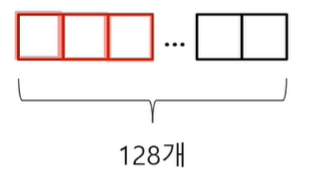

In [ ]:
!unzip -n "/content/drive/MyDrive/aiotmooc/음성 18차시.zip"

Archive:  /content/drive/MyDrive/aiotmooc/음성 18차시.zip
  inflating: F001.txt                
  inflating: F002.txt                
  inflating: F003.txt                
  inflating: F004.txt                
  inflating: F005.txt                
  inflating: F006.txt                
  inflating: F007.txt                
  inflating: F008.txt                
  inflating: F009.txt                
  inflating: F010.txt                
  inflating: M001.txt                
  inflating: M002.txt                
  inflating: M003.txt                
  inflating: M004.txt                
  inflating: M005.txt                
  inflating: M006.txt                
  inflating: M007.txt                
  inflating: M008.txt                
  inflating: M009.txt                
  inflating: M010.txt                


In [ ]:
 # 샘플 데이터 구조 확인
 fname = "F001.txt"

 for line in open(fname, 'r').readlines():
   line = line.strip()
   print(line) # 128 줄로 이루어져 있는 F0의 값들, 0: undifined (묵음 구간)

233.56435471406135
224.17741145346497
220.9395370818937
220.5415163396928
220.99345945194966
222.2437112007177
223.43875465126226
224.61735854903347
225.92817473748
226.42088775375532
227.1764761537766
227.695936429377
227.68498960941707
228.04343519941386
228.36099299693933
228.66175981323389
228.16704861211798
227.72110021834624
226.88285502935284
226.29760686851756
224.539261445789
222.6527040798723
219.113848395585
0
0
0
0
0
0
0
0
0
0
0
0
232.53096666603338
223.26845679579233
217.01905436745508
213.45306298453824
210.4845467970748
205.96499976106722
198.58955613494612
0
0
0
0
0
0
217.0562343368778
214.44011330515556
213.46777685454086
213.39486420182655
213.52763909782618
212.56679423052594
209.61681243290744
203.69178276628656
0
0
0
0
0
0
0
231.337730893545
216.3257173981473
213.28291798732036
211.64820863281417
210.64491366877783
210.30363615959538
210.80791032288826
211.42201749863457
211.7058042006231
211.60855905151467
211.6791614978657
210.8693174350508
209.00585524684024
208

In [ ]:
# 위와 같이 레이블이 없고 txt 형태인 데이터 숫자 형태로 변환
data = []

for line in open(fname, 'r').readlines():
  line = line.strip()
  line = float(line)
  data.append(line)

if 'F' in fname: # Femail 1
  lab = 1
  print(lab, data) # 이 결과가 화자 1명에 대한 RNN 입력 및 레이블 값

1 [233.56435471406135, 224.17741145346497, 220.9395370818937, 220.5415163396928, 220.99345945194966, 222.2437112007177, 223.43875465126226, 224.61735854903347, 225.92817473748, 226.42088775375532, 227.1764761537766, 227.695936429377, 227.68498960941707, 228.04343519941386, 228.36099299693933, 228.66175981323389, 228.16704861211798, 227.72110021834624, 226.88285502935284, 226.29760686851756, 224.539261445789, 222.6527040798723, 219.113848395585, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 232.53096666603338, 223.26845679579233, 217.01905436745508, 213.45306298453824, 210.4845467970748, 205.96499976106722, 198.58955613494612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 217.0562343368778, 214.44011330515556, 213.46777685454086, 213.39486420182655, 213.52763909782618, 212.56679423052594, 209.61681243290744, 203.69178276628656, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 231.337730893545, 216.3257173981473, 213.28291798732036, 211.64820863281417, 210.64491366877783, 210.30363615959538, 210.8079103

In [ ]:
# 여러 파일에 대해
import numpy as np
import glob

total_train = []
total_test = []
data = []

for f in glob.glob('./*.txt'): # 주로 데이터들을 불러오거나 정규식을 통해 공통 범위 내에 있는 것들을 가져오는 식 - list로 반환
  for line in open(f, 'r').readlines():
    line = line.strip()
    line = float(line)
    data.append(line)

  # list -> np : pytorch tensor랑 np가 밀접한 관계, 나중에 입력을 할 때 맞게끔 하기 위해 (list에서 pytorch tensor로 넘겨도 상관은 없음)
  data = np.array(data) # (128, )
  data = data.reshape((-1, 1)) # (128, ) -> (128, 1)

  if 'F' in f:
    lab = 1
  else:
    lab = 0

  if '001' in f:
    total_test.append([data, lab])
  else:
    total_train.append([data, lab])

  data = [] # 초기화

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.nn.init import kaiming_uniform_

In [ ]:
# RNN
class RNN(nn.Module):

  # 초기화 함수
  # 모델을 변수로 선언할 때 들어갈 인자들을 넣은 것
  def __init__(self, input_size, hidden_size, batch_first=True):
    super(RNN, self).__init__()
    self.hidden_size = hidden_size
    
    self.rnn = nn.RNN(input_size, hidden_size)
    self.fc1 = nn.Linear(hidden_size, hidden_size)
    kaiming_uniform_(self.fc1.weight, nonlinearity='relu') # weight 값 초기화
    self.fc2 = nn.Linear(hidden_size, 1)

  def forward(self, x):

    # self.rnn()의 output : x 와 time_step 마지막 hidden cell. 이 형태에 맞추지 않으면 error
    x, h_n = self.rnn(x) # input -> hidden
    x = F.relu(x)

    # 3D -> 2D (time_step 제거)
    x = x[:, -1, :] # rnn -> linear (linear : batch, input dimension의 2차원)

    x = self.fc1(x) # hidden -> hidden
    x = F.relu(x)

    x = self.fc2(x) # hidden -> 1 (output)

    return x

RNN 기본 형태 : time_step(sequence), batch_size, input_dimension(input feature) 순서의 3D Tensor  
batch_size, time_step(sequence), input_dim(input feature) 의 순서가 더 직관적  
-> 일반적으로 이렇게 많이 사용하므로 'batch_first=True' 써 줌  
 <br/>
hidden에서 output이 하나인 이유: criterion에 있는 BCE with LogitsLoss (sigmoid를 효율적으로 계산)

In [ ]:
# training
torch.manual_seed(777)

model = RNN(input_size=1, hidden_size=32)
model.cuda() # ***GPU에 모델 올리기

criterion = nn.BCEWithLogitsLoss() # binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr: 특히 데이터가 적을 경우 조정 필요 (하이퍼 파라미터)

# gradient update(parameter) 준비
model.train() 

# dataset 크기, 'lr' 고려
epochs = 100

for epoch in range(epochs):
  for x, y in total_train: # (음향 특징)input, label 
    x = torch.FloatTensor(np.array(x)).unsqueeze(0).cuda() # (128, 1) np array -> (1, 128, 1) 3d tensor /이 형태(batch_size, time_step, line별 data)로 모델에 넣어야 함 
    y = torch.FloatTensor([y]).unsqueeze(0).cuda()

    # gradient 초기화 (iteration 돌 때마다)
    optimizer.zero_grad()

    output = model(x)

    loss = criterion(output, y) # 예측값, 정답값 간의 오차

    loss.backward() # backpropagation : 오차가 어디서 영향을 받은건지 역추적

    optimizer.step() # 역추적 결과로 파라미터 조절하는 단계 - 다음 단계 준비
    # 여기 까지가 하나의 학습 (전체 데이터를 한 번 다 훑음)

  print("Epoch: {}: {}".format(epoch+1, loss.item()))

Epoch: 1: 0.3392053544521332
Epoch: 2: 0.41921550035476685
Epoch: 3: 0.49191033840179443
Epoch: 4: 0.5485775470733643
Epoch: 5: 0.5810955762863159
Epoch: 6: 0.6194297671318054
Epoch: 7: 0.6484469771385193
Epoch: 8: 0.6741948127746582
Epoch: 9: 0.6924833059310913
Epoch: 10: 0.7066924571990967
Epoch: 11: 0.7178492546081543
Epoch: 12: 0.7077869772911072
Epoch: 13: 0.7298351526260376
Epoch: 14: 0.7178735733032227
Epoch: 15: 0.7352141737937927
Epoch: 16: 0.7233646512031555
Epoch: 17: 0.7366892099380493
Epoch: 18: 0.724116861820221
Epoch: 19: 0.7351126670837402
Epoch: 20: 0.7263970375061035
Epoch: 21: 0.7282097339630127
Epoch: 22: 0.7244938611984253
Epoch: 23: 0.7263229489326477
Epoch: 24: 0.719071626663208
Epoch: 25: 0.7222757339477539
Epoch: 26: 0.7109030485153198
Epoch: 27: 0.7165743112564087
Epoch: 28: 0.700617253780365
Epoch: 29: 0.7098929286003113
Epoch: 30: 0.6947121620178223
Epoch: 31: 0.7053700089454651
Epoch: 32: 0.6780894994735718
Epoch: 33: 0.6959022879600525
Epoch: 34: 0.6698061

In [ ]:
# 평가(학습 X) : gradient 업데이트 안함
model.eval()

with torch.no_grad():
  for x, y in total_test:
    print("Label:", y)
    x = torch.FloatTensor(x).unsqueeze(0)
    x = Variable(x, requires_grad=False).cuda()
    # Variable: 없어도 큰 차이는 없는데, pytorch에서 만든 기능이기 때문에 안정면에서 써 줌
    # .cuda() : 꼭 써줘야 함. GPU에 데이터 로드

    y = torch.FloatTensor([y]).unsqueeze(0)
    y = Variable(y).cuda()
    
    output = model(x)

    loss = criterion(output, y)
    print("Loss:", loss, "\n")
    print("Output:", output, "\n") # score

    score = output[0][0]
    if score >= 0:
      pred_lab = "Female"
    else:
      pred_lab = "Male"

    print("Prediction:", pred_lab, "\n")
    print("-"*10)    

Label: 1
Loss: tensor(0.3437, device='cuda:0') 

Output: tensor([[0.8912]], device='cuda:0') 

Prediction: Female 

----------
Label: 0
Loss: tensor(0.2174, device='cuda:0') 

Output: tensor([[-1.4154]], device='cuda:0') 

Prediction: Male 

----------


0.8912 : 그래도 여성에 가까움  
-1.4154 : 확실히 남성에 가까움